## Overview

The purpose of this analysis is to understand which classification technique produces the best results on the breast cancer dataset. We will use 3 basic classification algorithms to predict breast cancer - 

- Decision Trees
- K-Nearest Neighbours
- Logistic Regression

### Important Packages

We will be using the scikit-learn package in python to train models for our prediction problem. We will also use matplotlib to visualize our results.

In [1]:
%matplotlib inline
from sklearn import tree, linear_model, neighbors
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Reading in required files

We will be using the breast cancer dataset provided by the UCI Machine learning Repository to test our algorithms.

In [2]:
# Reading the csv file
bc = pd.read_csv("wdbc_V2.csv")

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc.shape

(569, 33)

### Data Manipulation

From the data above, we see that M stands for Malignant and B stands for Benign. I will encode Malignant as 1 and Benign as 0 and proceed with our modelling process.

It also looks like there is one column that consists only of NaN values, which I will remove from our analysis.

In [5]:
# Splitting into independent and dependent sets
#Removing NA

bc.dropna(inplace = True, axis = 1, how = 'all')

X = bc.iloc[:,2:len(bc)]

Y = np.squeeze(bc['diagnosis'])

## Assigning Malignant as 1 and Benign as 0
Y = np.where(Y == 'M', 1,0)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualizing the decision boundary

I've plotted a chart below using two features - radius_mean and and compactness_mean. From this visualization, it looks like a high radius and high compactness, we can see more malginant tumors. 

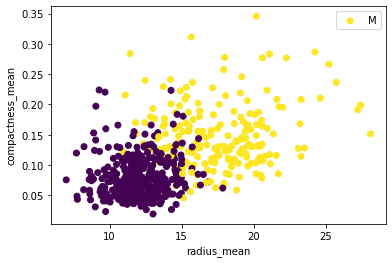

In [6]:
# Visualizing the data set 
plt.scatter(X['radius_mean'],X['compactness_mean'], c= Y)

plt.xlabel('radius_mean')
plt.ylabel('compactness_mean')
plt.legend(bc['diagnosis'])
plt.show()

### Split into train, test and validation

To avoid overfitting, we will split our data into 3 parts - train, test and validation. 

We will use the validation set to select the best model from all the different hyperparameters and then finally compare the results of all 3 different models on the testing dataset to decide which model works the best.

The split that I have chosen - 

- Train = 70% 
- Validation = 15%
- Test = 15%

In [7]:
#Train, test, validation split
random.seed(456)

X_train, X_rem, y_train, y_rem = train_test_split(X,
                                                  Y, 
                                                  train_size=0.7, 
                                                  stratify = Y)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,
                                                    y_rem, 
                                                    train_size=0.5, 
                                                    stratify = y_rem)

### Decision Tree

To get the best decision tree, I've fitted several decision trees of varying depths to see which one gives me the best f-measure on the validation set. 

The best model results are saved in clf_max_dd and the optimal depth is stored in opt_depth.

To prevent overfitting, I've limited the tree to maximum depth of 25. 




In [8]:
## Let's start modelling
### Fitting a decision tree classifier
random.seed(123)
n_iter = 25

max_f1 = 0

opt_depth = 0

## Arrays to store results of f1-scores from train and valid
f1_valid = np.zeros(n_iter+1)
f1_train = np.zeros(n_iter+1)

for i in range(1,n_iter+1):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    y_pred_val = clf.predict(X_valid)
    curr_f1 = f1_score(y_true = y_valid,y_pred = y_pred_val, pos_label= 1)
    
    f1_valid[i] = curr_f1
    
    y_pred_train = clf.predict(X_train)
    f1_train[i] = f1_score(y_true = y_train,y_pred = y_pred_train, pos_label= 1)
    
    if curr_f1 > max_f1:
        max_f1 = curr_f1
        clf_max_dd = clf
        opt_depth = i
    
        


### Decision tree results

The best decision tree has a depth of 3 when tested on the validation dataset. This is good as the chance of overfitting is reduced with lower depth. 

We can see the effect of overfitting as the gap between training and testing accuracies increase as we keep increasing the depth of the tree.

The precision, recall and f_score are summarized in the classification report shown below.

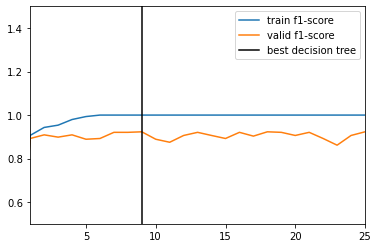

The decision tree with the best f1-score is one with a depth of 9
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.91      0.94      0.92        32

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



In [9]:
f1_train = pd.Series(f1_train)    
f1_valid = pd.Series(f1_valid)
    
plt.plot(f1_train, label = 'train f1-score')
plt.plot(f1_valid, label = 'valid f1-score')
plt.axvline(x=opt_depth, label = 'best decision tree', color = 'k')
plt.xlim([1, n_iter])
plt.ylim([0.5, 1.5])
plt.legend()
plt.show()
    
y_pred_val = clf_max_dd.predict(X_valid)


print("The decision tree with the best f1-score is one with a depth of " 
      + str(opt_depth))
print(classification_report(y_true = y_valid, y_pred = y_pred_val))



### K-nearest neighbours

I've run the K-nearest neighbours algorithm for a maximum of 25 neighbours. If we run it for more neighbours, we might risk underfitting the dataset and hence 25 seems like a fair cutoff.

I've normalized the dataset using min-max normalization for the training, validation and testing dataset separately to avoid information leakage.

In [10]:
### K-nearest neighbours

# specify the desired number of neighbors for our kNN classifier
max_neighbours = 25

## Arrays to store results of f1-scores from train and valid
f1_valid = np.zeros(max_neighbours+1)
f1_train = np.zeros(max_neighbours+1)

# set parameters
opt_neighbours = 0
max_f1 = 0
curr_f1 = 0


# Normalizing before knn
X_train_knn = MinMaxScaler().fit_transform(X_train)
X_valid_knn = MinMaxScaler().fit_transform(X_valid)
X_test_knn = MinMaxScaler().fit_transform(X_test)

#Modelling
for i in range(1,max_neighbours+1):
    clf_knn = neighbors.KNeighborsClassifier(i)
    clf_knn.fit(X_train_knn,y_train)
    
    y_pred_val = clf_knn.predict(X_valid_knn)
    curr_f1 = f1_score(y_true = y_valid,y_pred = y_pred_val, pos_label= 1)
    
    f1_valid[i] = curr_f1
    
    y_pred_train = clf_knn.predict(X_train_knn)
    f1_train[i] = f1_score(y_true = y_train,y_pred = y_pred_train, pos_label= 1)
    
    if curr_f1 > max_f1:
        max_f1 = curr_f1
        clf_max_knn = clf_knn
        opt_neighbours = i



### K-NN results

The best k-NN result is got by taking the number of neighbours parameter = 2. At k = 1, we can see that the model overfits, causing the large gap between the training f1-score and the validation f-1 score. 

At k = 6, it seems like the model works well, with the train f1-score and the validation f-1 score more or less equal. 

The classification report shown below also shows an f-1 score of 0.93, which is pretty good. 

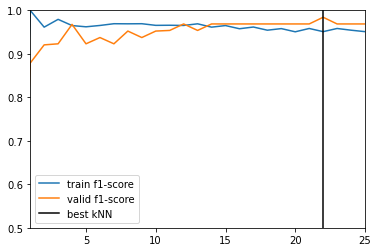

The KNN with the best f1-score is one with 22 neighbours
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.97      0.98        32

    accuracy                           0.99        85
   macro avg       0.99      0.98      0.99        85
weighted avg       0.99      0.99      0.99        85



In [11]:
#Visualizing results
f1_train = pd.Series(f1_train)    
f1_valid = pd.Series(f1_valid)        

plt.plot(f1_train, label = 'train f1-score')
plt.plot(f1_valid, label = 'valid f1-score')
plt.axvline(x=opt_neighbours, label = 'best kNN', color = 'k')
plt.xlim([1, max_neighbours])
plt.ylim([0.5, 1])
plt.legend()
plt.show()

y_pred_val = clf_max_knn.predict(X_valid_knn)
print("The KNN with the best f1-score is one with " + 
      str(opt_neighbours) + " neighbours")
print(classification_report(y_true = y_valid, y_pred = y_pred_val))

### Logistic Regression

I've run a logistic regression model and applied l2 regularization to possibly prevent overfitting. 

I have tried it for 20 different penalty values, ranging from 0.05 to 1.0. 

In [12]:
## Logistic Regression
penalties = 100
## Arrays to store results of f1-scores from train and valid
f1_valid = np.zeros(penalties+1)
f1_train = np.zeros(penalties+1)

## Normalizing before regularization
X_train_logit = StandardScaler().fit_transform(X_train)
X_valid_logit = StandardScaler().fit_transform(X_valid)
X_test_logit = StandardScaler().fit_transform(X_test)
# create the model

max_f1 = 0
curr_f1 = 0

for i in range(1,100):
    
    j = i
    
    clf_logit = linear_model.LogisticRegression(C=i,penalty = 'l2',
                                                tol = 0.01, 
                                                solver = 'newton-cg')
    
    
    clf_logit.fit(X_train_logit,y_train)
    
    
    y_pred_val = clf_logit.predict(X_valid_logit)
    curr_f1 = f1_score(y_true = y_valid,y_pred = y_pred_val, pos_label= 1)
    
    f1_valid[j] = curr_f1
    
    y_pred_train = clf_logit.predict(X_train_logit)
    f1_train[j] = f1_score(y_true = y_train,y_pred = y_pred_train, pos_label= 1)
    
    if curr_f1 > max_f1:
        max_f1 = curr_f1
        clf_max_logit = clf_logit
        opt_C = i



### Logistic Regression Results

It looks like the best option for logistic regression is one with l2 regularization, with the inverse regularization strength = 43.c

The classification report shows a weighted avg f-1 score of 0.95, which is the highest score so far from all the approaches we have tried. 

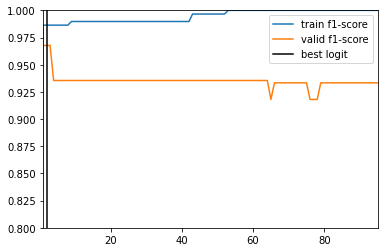

The Logistic Regression with the best f1-score is one with a penalty of 1
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.94      0.97        32

    accuracy                           0.98        85
   macro avg       0.98      0.97      0.97        85
weighted avg       0.98      0.98      0.98        85



In [13]:
f1_train = pd.Series(f1_train)    
f1_valid = pd.Series(f1_valid)        

plt.plot(f1_train, label = 'train f1-score')
plt.plot(f1_valid, label = 'valid f1-score')
plt.axvline(x=opt_C+1, label = 'best logit', color = 'k')
plt.xlim([1, penalties-5])
plt.ylim([0.8, 1])
plt.legend()
plt.show()

y_pred_val = clf_max_logit.predict(X_valid_logit)
print("The Logistic Regression with the best f1-score is one with a penalty of "
      + str(opt_C))
print(classification_report(y_true = y_valid, y_pred = y_pred_val))


### Summarizing results

After getting the best model of each type, we use the models on the test data to see which model performs the best. 

According to the classification report shown below, the weighted avg f-scores are as follows- 

1. Decision Tree = 0.91
2. KNN - 0.93
3. Logistic Regression - 0.97

According to the classification report, I would choose the Logistic Regression as it has the highest f-score and best performance of all the models that we have tried so far.

In [14]:
## Now that we have selected the models, let us see their performance on the test data set

y_pred_test_dt = clf_max_dd.predict(X_test)
y_pred_test_knn = clf_max_knn.predict(X_test_knn)
y_pred_test_logit = clf_max_logit.predict(X_test_logit)

print("Decision Tree results - ")
print(classification_report(y_true = y_test, y_pred = y_pred_test_dt))

print("KNN results - ")
print(classification_report(y_true = y_test, y_pred = y_pred_test_knn))

print("Logistic Regression results - ")
print(classification_report(y_true = y_test, y_pred = y_pred_test_logit))

Decision Tree results - 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.86      0.94      0.90        32

    accuracy                           0.92        86
   macro avg       0.91      0.92      0.91        86
weighted avg       0.92      0.92      0.92        86

KNN results - 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.94      0.97      0.95        32

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86

Logistic Regression results - 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
wei